In [2]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier as RFC

### Data exploration

In [3]:
df = pd.read_csv("G:\Github\DS-assignments-python\Decision Tree\Fraud_check.csv")

In [4]:
df.shape

(600, 6)

In [5]:
df.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
5,NO,Divorced,33329,116382,0,NO
6,NO,Divorced,83357,80890,8,YES
7,YES,Single,62774,131253,3,YES
8,NO,Single,83519,102481,12,YES
9,YES,Divorced,98152,155482,4,YES


In [6]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [8]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [9]:
df['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [10]:
type(df.index)

pandas.core.indexes.range.RangeIndex

In [11]:
# best one liners in coding to map dual values baby --
df["Taxable.Income"] = pd.Series(np.where(df["Taxable.Income"]<=30000,0,1),df.index)

### lil bit of data visualization

##### watching for - Histogram ,outliers,CORR between columns,Collumn importance Value via ......   , category column dietribution and trends


In [12]:
# collecting numerical data in a different list
num_col = [f for f in list(df.columns) if df[f].dtype != "O" ]
obj_col = [f for f in list(df.columns) if df[f].dtype == "O" ]

In [13]:
obj_col

['Undergrad', 'Marital.Status', 'Urban']

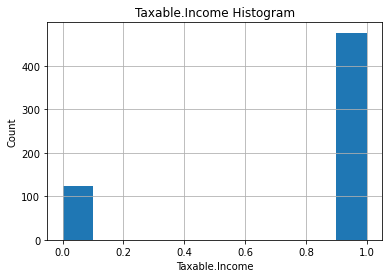

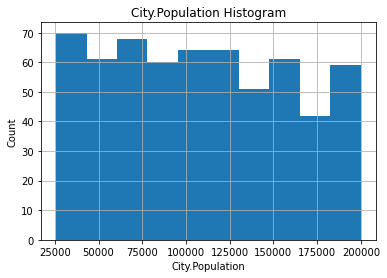

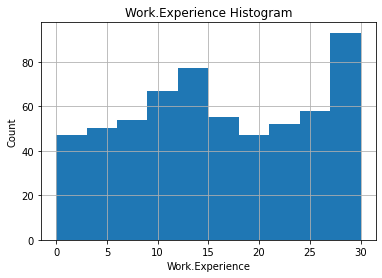

In [14]:
for i in num_col:
    df[i].hist()
    plt.xlabel(i)
    plt.ylabel("Count")
    plt.title(i+" Histogram")
    plt.show()

##### hitogram look good ....not any collumn with highly skewed values

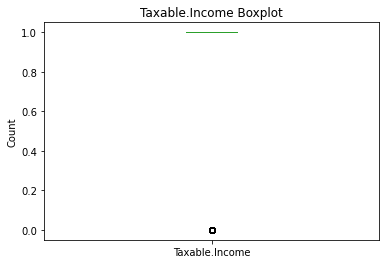

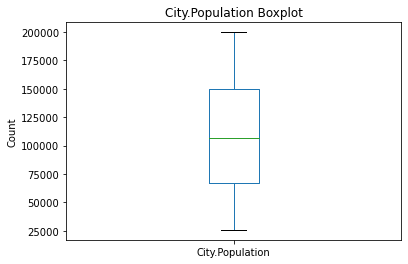

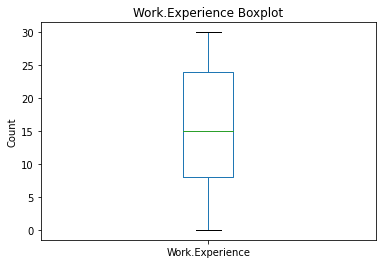

In [15]:
for i in num_col:
    df[i].plot.box()
    plt.ylabel("Count")
    plt.title(i+" Boxplot")
    plt.show()

#### no outliers 

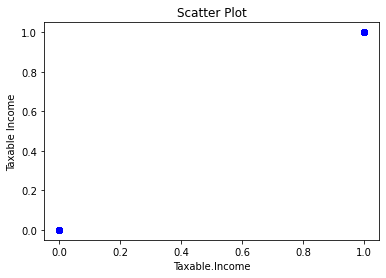

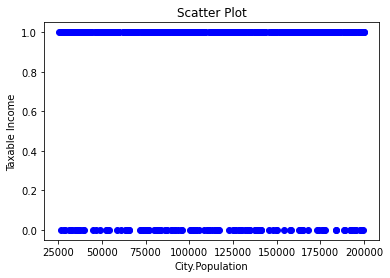

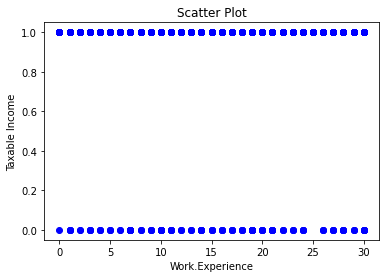

In [16]:
for i in num_col:
    plt.plot(df[i],df["Taxable.Income"],"bo")
    plt.xlabel(i)
    plt.ylabel("Taxable Income")
    plt.title("Scatter Plot")
    plt.show()

##### to see whether any numerical collumn as significant coreelation

<AxesSubplot:>

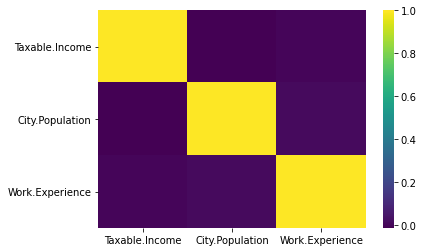

In [17]:
corrs = df.corr()
plt.figure()
sns.heatmap(corrs,xticklabels='auto',yticklabels='auto',cbar=True,cmap="viridis")

C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sumit\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


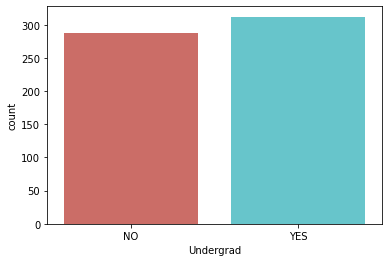

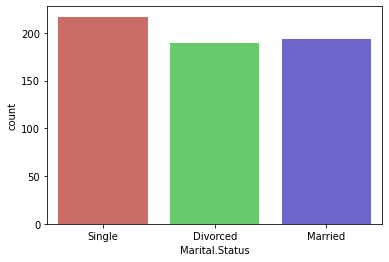

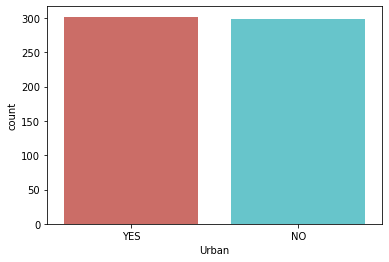

In [18]:
for i in obj_col:
    plt.figure()
    sns.countplot(i, data=df, palette='hls')

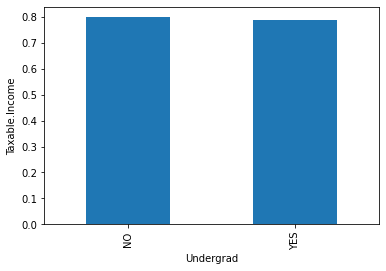

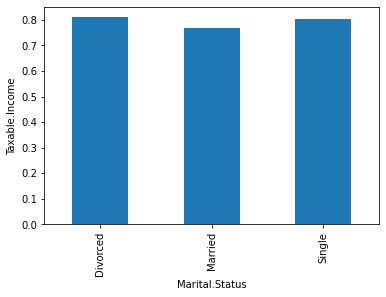

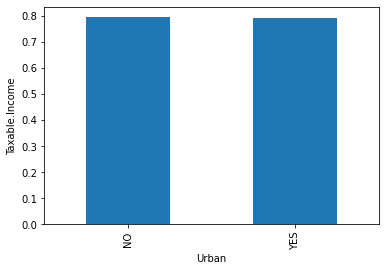

In [19]:
for i in obj_col:
    plt.figure()
    df.groupby(i)['Taxable.Income'].mean().plot.bar(); plt.xlabel(i); plt.ylabel('Taxable.Income')

#### in terms of categories....the data seems to be balanced
#### taxable income doesn't show any sway toeards a particular category...which i thought would be different for undergrad...but it is what it is

### Creating dummy variables and final dataset for decision tree algo

In [20]:
dum_m = pd.get_dummies(df,columns = ['Undergrad', 'Marital.Status','Urban'],drop_first = True)

In [21]:
dum_m

,Taxable.Income,City.Population,Work.Experience,Undergrad_YES,Marital.Status_Married,Marital.Status_Single,Urban_YES
0,1,50047,10,0,0,1,1
1,1,134075,18,1,0,0,1
2,1,160205,30,0,1,0,1
3,1,193264,15,1,0,1,1
4,1,27533,28,0,1,0,0
...,...,...,...,...,...,...,...
595,1,39492,7,1,0,0,1
596,1,55369,2,1,0,0,1
597,1,154058,0,0,0,0,1
598,1,180083,17,1,1,0,0


In [22]:
#creating test and train data
tr_df,ts_df = train_test_split(dum_m,test_size = 0.3,random_state= 13)

In [23]:
tr_df_y = tr_df.iloc[:,0]
tr_df_x = tr_df.iloc[:,1:]
ts_df_y = ts_df.iloc[:,0]
ts_df_x = ts_df.iloc[:,1:]

In [24]:
tr_df_x.shape

(420, 6)

## RandomForest Model Preperation and parameter tuning 

Random Forest syntax and params - 
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

- From prvious assignment of decision tree ...we know the max depth to which tree goes in Gini i.e. 18 
- max_features{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
    The number of features to consider when looking for the best split:

    If int, then consider max_features features at each split.

    If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split.

    If “auto”, then max_features=sqrt(n_features).
    
    If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).

    If “log2”, then max_features=log2(n_features).

    If None, then max_features=n_features.
    
- max_samplesint or float, default=None
    If bootstrap is True, the number of samples to draw from X to train each base estimator.

In [37]:
mark1 = RFC(n_estimators = 100,criterion = "gini",random_state = 13,oob_score = True)

In [38]:
mark1.fit(tr_df_x,tr_df_y)

RandomForestClassifier(oob_score=True, random_state=13)

In [41]:
print(mark1.oob_score_,mark1.n_features_in_)

0.719047619047619 6


In [33]:
tr_pred = mark1.predict(tr_df_x)
ts_pred = mark1.predict(ts_df_x)

In [31]:
np.mean(tr_pred == tr_df_y)
#accuracy is 100

1.0

In [34]:
np.mean(ts_pred == ts_df_y)
#accuracy is 77%

0.7722222222222223

As we can see are having overfitting problem a bit

#### lets test for multiple depth values and minimal sample vale for split

In [85]:
depth_score = []
for i in range (3,20):
    markx = RFC(n_estimators = 100,criterion = "gini", max_depth = i ,random_state = 13)
    markx.fit(tr_df_x,tr_df_y)
    pred_tr = markx.predict(tr_df_x)
    pred_ts = markx.predict(ts_df_x)
    tr_ac = np.mean(pred_tr == tr_df_y)
    ts_ac = np.mean(pred_ts == ts_df_y)
    f = [i , tr_ac , ts_ac]
    depth_score.append(f)

In [86]:
depth_score_df = pd.DataFrame(depth_score, columns = ["Depth_lvl","Training Accuracy", "Test Accuracy"])

In [88]:
depth_score_df

,Depth_lvl,Training Accuracy,Test Accuracy
0,3,0.778571,0.827778
1,4,0.778571,0.827778
2,5,0.780952,0.827778
3,6,0.790476,0.827778
4,7,0.833333,0.833333
5,8,0.897619,0.827778
6,9,0.942857,0.805556
7,10,0.990476,0.766667
8,11,0.997619,0.783333
9,12,1.000000,0.783333


In [62]:
sample_score = []
for i in range (2,30):
    markx = RFC(n_estimators = 100,criterion = "gini", min_samples_split = i ,random_state = 13)
    markx.fit(tr_df_x,tr_df_y)
    pred_tr = markx.predict(tr_df_x)
    pred_ts = markx.predict(ts_df_x)
    tr_ac = np.mean(pred_tr == tr_df_y)
    ts_ac = np.mean(pred_ts == ts_df_y)
    f = [i , tr_ac , ts_ac]
    sample_score.append(f)

In [67]:
sample_score_df = pd.DataFrame(sample_score , columns = ["Min_Sample", "Training Accuracy","Test Accuracy"])

In [69]:
sample_score_df

,Min_Sample,Training Accuracy,Test Accuracy
0,2,1.000000,0.772222
1,3,0.988095,0.783333
2,4,0.969048,0.800000
3,5,0.897619,0.811111
4,6,0.866667,0.811111
5,7,0.859524,0.827778
6,8,0.840476,0.822222
7,9,0.816667,0.833333
8,10,0.792857,0.827778
9,11,0.792857,0.827778


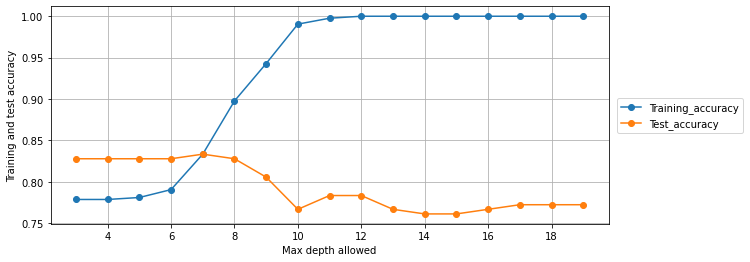

In [91]:
plt.figure(figsize = (10,4))
plt.plot(depth_score_df["Depth_lvl"],depth_score_df["Training Accuracy"], marker ="o")
plt.plot(depth_score_df["Depth_lvl"], depth_score_df["Test Accuracy"], marker ="o")
plt.legend(["Training_accuracy","Test_accuracy"],bbox_to_anchor = (1.25, 0.6))
plt.xlabel("Max depth allowed")
plt.ylabel("Training and test accuracy")
plt.grid(True)
plt.show()

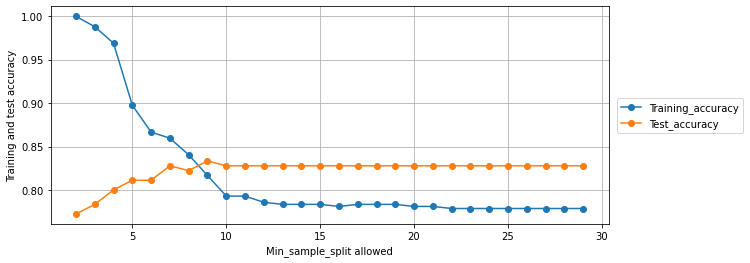

In [93]:
plt.figure(figsize = (10,4))
plt.plot(sample_score_df["Min_Sample"],sample_score_df["Training Accuracy"], marker ="o")
plt.plot(sample_score_df["Min_Sample"], sample_score_df["Test Accuracy"], marker ="o")
plt.legend(["Training_accuracy","Test_accuracy"],bbox_to_anchor = (1.25, 0.6))
plt.xlabel("Min_sample_split allowed")
plt.ylabel("Training and test accuracy")
plt.grid(True)
plt.show()

Best point for Max depth is 7 and min_sample_split is 9

##### Final Random Forst model

In [97]:
mark42 = RFC(n_estimators = 100 ,criterion = "gini", max_depth = 7, min_samples_split = 9 , random_state = 13)

In [98]:
mark42.fit(tr_df_x,tr_df_y)

RandomForestClassifier(max_depth=7, min_samples_split=9, random_state=13)

In [99]:
tr_pred_42 = mark42.predict(tr_df_x)
ts_pred_42 = mark42.predict(ts_df_x)

In [100]:
np.mean(tr_pred_42 == tr_df_y)
#accuracy is 78%

0.7833333333333333

In [102]:
np.mean(ts_pred_42 == ts_df_y)
#accuracy is 82%

0.8277777777777777